<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost for Kaggle

### Initializations

In [22]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Load Data with Selected Features from Above

Nach dem Hinzufügen der zusätzlichen Attribute wurde das gleiche Verfahren wie im Schritt dazu diesmal auf das künstlich angereicherte Datenset durchgeführt. Nach dem Laden der Daten fand wieder ein schrittweises Tunen der Hyperparameter statt.

In [7]:
dff = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [8]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [9]:
df = pd.get_dummies(dff.drop([ 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,hasLeftCompany
0,0.65,0.96,5,226,2,2.500000,1084.8,146.90,2603.52,0.6240,...,0,1,0,0,0,0,0,0,1,0
1,0.88,0.80,3,166,2,1.500000,1328.0,146.08,1593.60,0.7040,...,0,0,0,0,0,0,0,1,0,0
2,0.69,0.98,3,214,2,1.500000,1712.0,147.66,2516.64,0.6762,...,0,0,0,1,0,0,0,1,0,0
3,0.41,0.47,2,154,3,0.666667,2772.0,63.14,868.56,0.1927,...,0,0,0,1,0,0,0,1,0,1
4,0.87,0.76,5,254,2,2.500000,1219.2,220.98,2316.48,0.6612,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y_train = df['hasLeftCompany'].values
y_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [11]:
X_train = df.drop(['hasLeftCompany'], axis=1).values
X_train

array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.88,  0.8 ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.69,  0.98,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ..., 
       [ 0.83,  0.86,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.74,  0.56,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]])

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
dfy = pd.read_pickle('exchange/hr_01_enriched_test.pkl')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
id                                 4999 non-null int64
satisfactionLevel                  4999 non-null float64
yearsSinceEvaluation               4999 non-null float64
numberOfProjects                   4999 non-null int64
averageMonthlyHours                4999 non-null int64
yearsAtCompany                     4999 non-null int64
workAccident                       4999 non-null category
gotPromotion                       4999 non-null category
department                         4999 non-null category
salary                             4999 non-null category
projectsPerYear                    4999 non-null float64
hoursPerProject                    4999 non-null float64
satisfactionHours                  4999 non-null float64
workingHoursSinceLastEvaluation    4999 non-null float64
evaluationSatisfaction             4999 non-null float64
projectsPerWorkingHour             4999 no

In [15]:
# Datentyp von Category in Object umwandeln
for col in dfy.select_dtypes(['category']):
    print('transforming', col)
    dfy[col] = dfy[col].astype('str')

transforming workAccident
transforming gotPromotion
transforming department
transforming salary


In [16]:
df = pd.get_dummies(dfy.drop(['id'], axis=1)).join(dfy[['id']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,id
0,0.81,0.96,4,219,2,2.000000,1314.0,177.39,2522.88,0.7776,...,0,0,0,0,0,1,0,1,0,10000
1,0.86,0.84,4,246,6,0.666667,4428.0,211.56,2479.68,0.7224,...,0,0,0,0,0,0,0,1,0,10001
2,0.90,0.66,4,242,3,1.333333,2178.0,217.80,1916.64,0.5940,...,0,0,0,0,1,0,1,0,0,10002
3,0.37,0.54,2,131,3,0.666667,2358.0,48.47,848.88,0.1998,...,0,0,0,0,0,0,0,0,1,10003
4,0.52,0.96,3,271,3,1.000000,3252.0,140.92,3121.92,0.4992,...,0,0,0,0,0,1,0,0,1,10004


In [17]:
ids = df['id']
ids.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64

In [18]:
X_test = df.drop(['id'], axis=1).values
X_test

array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.86,  0.84,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.9 ,  0.66,  4.  , ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.66,  0.73,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.79,  1.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]])

In [19]:
X_test_scaled = scaler.transform(X_test)

### Tune Parameters Step by Step

#### Tuning tree-specific parameters

In [26]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_test1 = {'n_estimators':range(60,121,5)}
clf = GradientBoostingClassifier(learning_rate=0.3, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(estimator=clf,param_grid=param_test1,n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(60, 121, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.97870, std: 0.00150, params: {'n_estimators': 60},
  mean: 0.97900, std: 0.00187, params: {'n_estimators': 65},
  mean: 0.97990, std: 0.00289, params: {'n_estimators': 70},
  mean: 0.97990, std: 0.00307, params: {'n_estimators': 75},
  mean: 0.98060, std: 0.00188, params: {'n_estimators': 80},
  mean: 0.98140, std: 0.00297, params: {'n_estimators': 85},
  mean: 0.98200, std: 0.00316, params: {'n_estimators': 90},
  mean: 0.98280, std: 0.00277, params: {'n_estimators': 95},
  mean: 0.98290, std: 0.00323, params: {'n_estimators': 100},
  mean: 0.98340, std: 0.00315, params: {'n_estimators': 105},
  mean: 0.98270, std: 0.00279, params: {'n_estimators': 110},
  mean: 0.98280, std: 0.00308, params: {'n_estimators': 115},
  mean: 0.98320, std: 0.00254, params: {'n_estimators': 120}],
 {'n_estimators': 105},
 0.98339999999999994)

In [36]:
param_test2 = {'max_depth':range(8,12,1), 'min_samples_split':range(300,401,10)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105, max_features='sqrt', subsample=0.8, random_state=10)
gsearch2 = GridSearchCV(estimator=clf, 
param_grid = param_test2,n_jobs=-1,iid=False, cv=5)
gsearch2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(8, 12), 'min_samples_split': range(300, 401, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98240, std: 0.00111, params: {'max_depth': 8, 'min_samples_split': 300},
  mean: 0.98260, std: 0.00289, params: {'max_depth': 8, 'min_samples_split': 310},
  mean: 0.98350, std: 0.00145, params: {'max_depth': 8, 'min_samples_split': 320},
  mean: 0.98230, std: 0.00117, params: {'max_depth': 8, 'min_samples_split': 330},
  mean: 0.98130, std: 0.00242, params: {'max_depth': 8, 'min_samples_split': 340},
  mean: 0.98310, std: 0.00280, params: {'max_depth': 8, 'min_samples_split': 350},
  mean: 0.98380, std: 0.00147, params: {'max_depth': 8, 'min_samples_split': 360},
  mean: 0.98320, std: 0.00150, params: {'max_depth': 8, 'min_samples_split': 370},
  mean: 0.98400, std: 0.00228, params: {'max_depth': 8, 'min_samples_split': 380},
  mean: 0.98330, std: 0.00199, params: {'max_depth': 8, 'min_samples_split': 390},
  mean: 0.98290, std: 0.00263, params: {'max_depth': 8, 'min_samples_split': 400},
  mean: 0.98380, std: 0.00144, params: {'max_depth': 9, 'min_samples_split': 300},
  me

In [40]:
param_test3 = {'min_samples_split':range(300,401,20), 'min_samples_leaf':range(1,5,1)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105, max_features='sqrt', subsample=0.8, random_state=10, max_depth=10)
gsearch3 = GridSearchCV(estimator=clf, param_grid = param_test3, n_jobs=-1,iid=False, cv=5)
gsearch3.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': range(300, 401, 20), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98370, std: 0.00196, params: {'min_samples_leaf': 1, 'min_samples_split': 300},
  mean: 0.98410, std: 0.00222, params: {'min_samples_leaf': 1, 'min_samples_split': 320},
  mean: 0.98310, std: 0.00124, params: {'min_samples_leaf': 1, 'min_samples_split': 340},
  mean: 0.98260, std: 0.00432, params: {'min_samples_leaf': 1, 'min_samples_split': 360},
  mean: 0.98330, std: 0.00223, params: {'min_samples_leaf': 1, 'min_samples_split': 380},
  mean: 0.98330, std: 0.00169, params: {'min_samples_leaf': 1, 'min_samples_split': 400},
  mean: 0.98340, std: 0.00183, params: {'min_samples_leaf': 2, 'min_samples_split': 300},
  mean: 0.98480, std: 0.00121, params: {'min_samples_leaf': 2, 'min_samples_split': 320},
  mean: 0.98400, std: 0.00217, params: {'min_samples_leaf': 2, 'min_samples_split': 340},
  mean: 0.98290, std: 0.00213, params: {'min_samples_leaf': 2, 'min_samples_split': 360},
  mean: 0.98320, std: 0.00125, params: {'min_samples_leaf': 2, 'min_samples_split': 380},
  mean: 0.

In [42]:
param_test4 = {'max_features':range(1,13,1)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11, min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10)
gsearch4 = GridSearchCV(estimator=clf, param_grid = param_test4,n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(1, 13)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [43]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98060, std: 0.00252, params: {'max_features': 1},
  mean: 0.98250, std: 0.00105, params: {'max_features': 2},
  mean: 0.98400, std: 0.00158, params: {'max_features': 3},
  mean: 0.98390, std: 0.00139, params: {'max_features': 4},
  mean: 0.98360, std: 0.00258, params: {'max_features': 5},
  mean: 0.98410, std: 0.00159, params: {'max_features': 6},
  mean: 0.98400, std: 0.00145, params: {'max_features': 7},
  mean: 0.98510, std: 0.00150, params: {'max_features': 8},
  mean: 0.98390, std: 0.00229, params: {'max_features': 9},
  mean: 0.98460, std: 0.00280, params: {'max_features': 10},
  mean: 0.98350, std: 0.00251, params: {'max_features': 11},
  mean: 0.98400, std: 0.00249, params: {'max_features': 12}],
 {'max_features': 8},
 0.98510000000000009)

In [44]:
param_test5 = {'subsample':[0.7,0.75,0.775,0.8,0.825,0.85,0.9]}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)
gsearch5 = GridSearchCV(estimator=clf,param_grid = param_test5,n_jobs=-1,iid=False, cv=5)
gsearch5.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.75, 0.775, 0.8, 0.825, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98250, std: 0.00308, params: {'subsample': 0.7},
  mean: 0.98310, std: 0.00254, params: {'subsample': 0.75},
  mean: 0.98370, std: 0.00169, params: {'subsample': 0.775},
  mean: 0.98510, std: 0.00150, params: {'subsample': 0.8},
  mean: 0.98350, std: 0.00274, params: {'subsample': 0.825},
  mean: 0.98400, std: 0.00245, params: {'subsample': 0.85},
  mean: 0.98470, std: 0.00242, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.98510000000000009)

#### Tuning learning_rate and n_estimators

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)

In [72]:
param_space = {'n_estimators':[210,420,840,1680], 'learning_rate':[0.075,0.0375,0.01875,0.009375]}

In [73]:
gs = GridSearchCV(clf, param_space, cv=5, n_jobs=-1)

In [74]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [210, 420, 840, 1680], 'learning_rate': [0.075, 0.0375, 0.01875, 0.009375]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


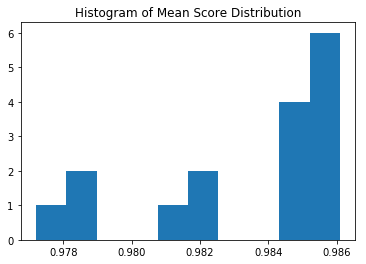

In [75]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [76]:
gs.best_score_

0.98609999999999998

In [77]:
gs.best_params_

{'learning_rate': 0.0375, 'n_estimators': 420}

### Predicting Kaggle Data

In [20]:
clf = GradientBoostingClassifier(learning_rate=0.0375, n_estimators=420,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)

In [23]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98710048710048726

In [24]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0375, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=420,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

In [25]:
predictions = clf.predict(X_test_scaled)
list(predictions);

In [26]:
list(ids);

In [84]:
df = pd.DataFrame(
    {'id': ids,
     'left': predictions
    })
df.head()

,id,left
0,10000,0
1,10001,1
2,10002,0
3,10003,1
4,10004,0


In [85]:
df.to_csv('kaggle/gradient_boost.csv', index=False)

**Ergebnis in Kaggle:** 98.932%